In [28]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

In [2]:
classified = gpd.read_file("/Users/iosefa/Dropbox/Academic/classified_100.gpkg")

In [8]:
classified.columns

Index(['segment_id', 'feature_class', 'b0_mean', 'b0_variance', 'b0_contrast',
       'b0_correlation', 'b1_mean', 'b1_variance', 'b1_contrast',
       'b1_correlation', 'b2_mean', 'b2_variance', 'b2_contrast',
       'b2_correlation', 'b3_mean', 'b3_variance', 'b3_contrast',
       'b3_correlation', 'b4_mean', 'b4_variance', 'b4_contrast',
       'b4_correlation', 'b5_mean', 'b5_variance', 'b5_contrast',
       'b5_correlation', 'predicted_class', 'geometry'],
      dtype='object')

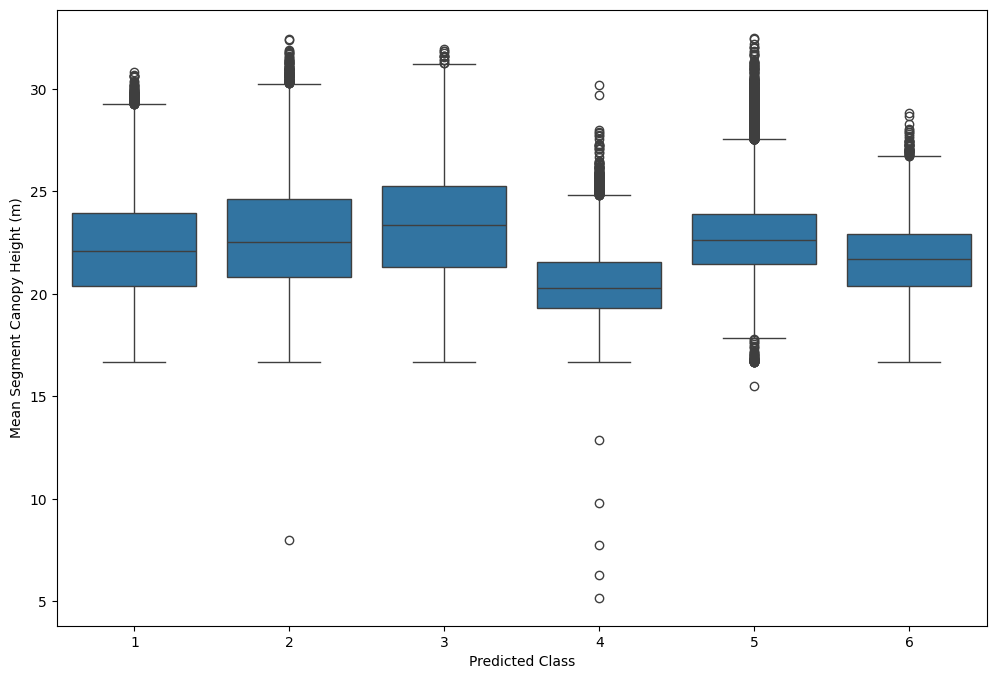

In [20]:
classified['b5_mean_rescaled'] = (classified['b5_mean'] / 255) * 33.5

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=classified, x='predicted_class', y='b5_mean_rescaled')
plt.title('')
plt.xlabel('Predicted Class')
plt.ylabel('Mean Segment Canopy Height (m)')
plt.show()

In [19]:
# Calculate the area for each geometry
classified['area'] = classified.geometry.area

# Aggregate the total area by predicted_class
area_by_class = classified.groupby('predicted_class')['area'].sum().reset_index()

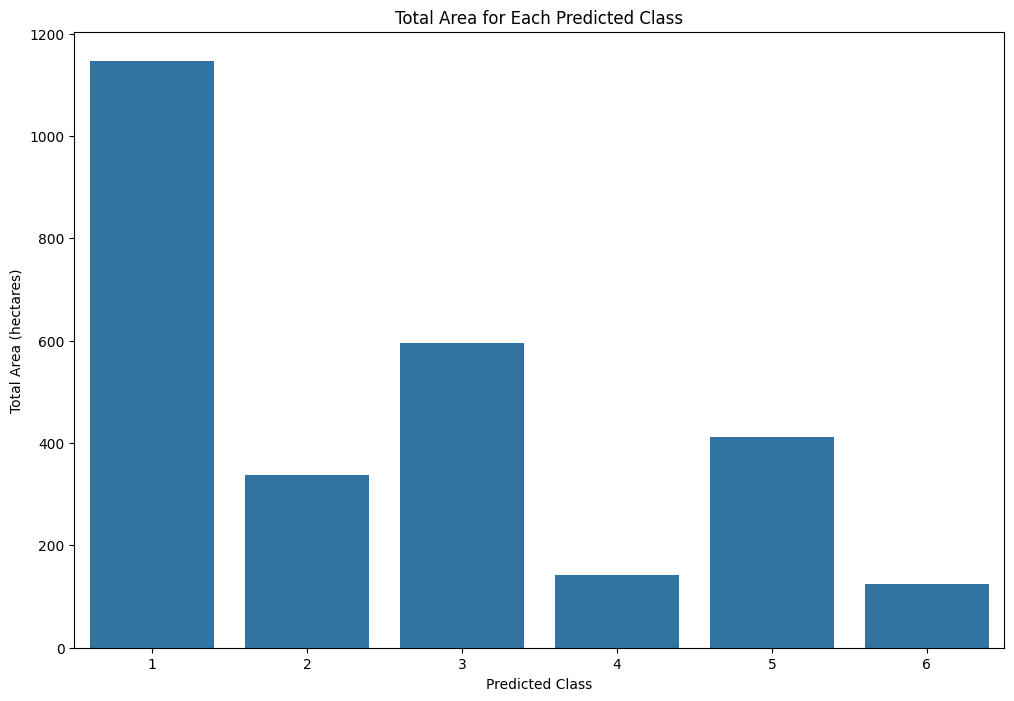

In [22]:
classified['area_ha'] = classified['area'] / 10000

# Aggregate the total area by predicted_class
area_by_class = classified.groupby('predicted_class')['area_ha'].sum().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=area_by_class, x='predicted_class', y='area_ha')
plt.title('Total Area for Each Predicted Class')
plt.xlabel('Predicted Class')
plt.ylabel('Total Area (hectares)')
plt.show()

Reading plot-level cloud: complete
RANSAC cylinder fit: 0.186582
Segmenting extended cylinder: NOU11.c.0.pcd
Segmenting ground returns: NOU11.c.ng.0.pcd
Region-based segmentation: NOU11.c.ng.r.0.pcd
Correcting stem: NOU11.stem.0.pcd
RANSAC cylinder fit: 0.200853
Segmenting extended cylinder: NOU11.c.1.pcd
Segmenting ground returns: NOU11.c.ng.1.pcd
Region-based segmentation: NOU11.c.ng.r.1.pcd
Correcting stem: NOU11.stem.1.pcd
RANSAC cylinder fit: 0.145027
Segmenting extended cylinder: NOU11.c.2.pcd
Segmenting ground returns: NOU11.c.ng.2.pcd
Region-based segmentation: NOU11.c.ng.r.2.pcd
Correcting stem: NOU11.stem.2.pcd
RANSAC cylinder fit: 0.108524
Segmenting extended cylinder: NOU11.c.3.pcd
Segmenting ground returns: NOU11.c.ng.3.pcd
Region-based segmentation: NOU11.c.ng.r.3.pcd
Correcting stem: NOU11.stem.3.pcd
RANSAC cylinder fit: 0.0867412
Segmenting extended cylinder: NOU11.c.4.pcd
Segmenting ground returns: NOU11.c.ng.4.pcd
Region-based segmentation: NOU11.c.ng.r.4.pcd
Correcting stem: NOU11.stem.4.pcd
RANSAC cylinder fit: 0.128987
Segmenting extended cylinder: NOU11.c.5.pcd
Segmenting ground returns: NOU11.c.ng.5.pcd
Region-based segmentation: NOU11.c.ng.r.5.pcd
Correcting stem: NOU11.stem.5.pcd
RANSAC cylinder fit: 0.10325
Segmenting extended cylinder: NOU11.c.6.pcd
Segmenting ground returns: NOU11.c.ng.6.pcd
Region-based segmentation: NOU11.c.ng.r.6.pcd
Correcting stem: NOU11.stem.6.pcd
RANSAC cylinder fit: 0.0754147
Segmenting extended cylinder: NOU11.c.7.pcd
Segmenting ground returns: NOU11.c.ng.7.pcd
Region-based segmentation: NOU11.c.ng.r.7.pcd
Correcting stem: NOU11.stem.7.pcd
RANSAC cylinder fit: 0.0927443
Segmenting extended cylinder: NOU11.c.8.pcd
Segmenting ground returns: NOU11.c.ng.8.pcd
Region-based segmentation: NOU11.c.ng.r.8.pcd
Correcting stem: NOU11.stem.8.pcd
RANSAC cylinder fit: 0.0691813
Segmenting extended cylinder: NOU11.c.9.pcd
Segmenting ground returns: NOU11.c.ng.9.pcd
Region-based segmentation: NOU11.c.ng.r.9.pcd
Correcting stem: NOU11.stem.9.pcd


calculated
0.186582
0.200853
0.145027
0.108524
0.0867412
0.128987
0.0927443

measured
15.8
24.9
13.8
15.7
18.5
14.1
15.9


In [ ]:
Reading plot-level cloud: complete
20.7, 20.9, 15.9, 12.1, 13.1, 9.8, 12.8


In [32]:
calculated = [20.7, 20.9, 15.9, 12.1, 13.1, 9.8, 12.8]
measured =   [15.8, 24.9, 13.8, 15.7, 18.5, 14.1, 15.9]

# Sort the calculated and measured values separately
calculated_sorted = sorted(calculated)
measured_sorted = sorted(measured)

# Create a DataFrame with the sorted values
df_sorted = pd.DataFrame({'calculated': calculated_sorted, 'measured': measured_sorted})

slope, intercept, r_value, p_value, std_err = linregress(df_sorted['calculated'], df_sorted['measured'])

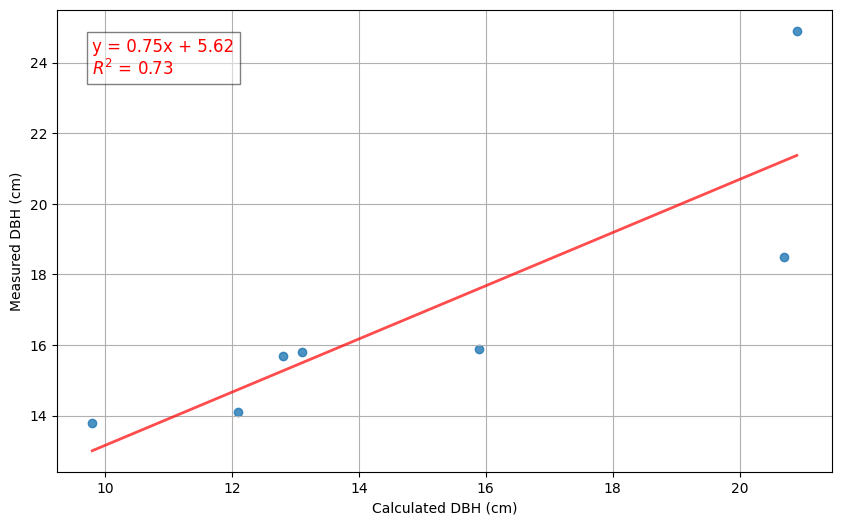

In [39]:
plt.figure(figsize=(10, 6))
sns.regplot(x='calculated', y='measured', data=df_sorted, ci=None, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('')
plt.xlabel('Calculated DBH (cm)')
plt.ylabel('Measured DBH (cm)')
plt.grid(True)

# Display the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}'
plt.text(min(df_sorted['calculated']), max(df_sorted['measured']) * 0.95, equation, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))

plt.show()